## Решение краевой задачи
$$
u''(x) = f(x) \\
u'(0) = s \\
u(1) = b
$$
Нужно обратить внимание на то, что порядок аппроксимации граничного условия определяет порядок аппроксимации (и точность) всего метода в целом.

Error = 9.05e-03


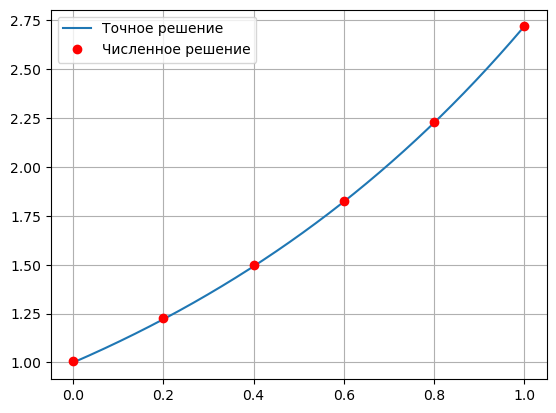

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: np.exp(x)
u = lambda x: np.exp(x)

# b.c.
s = 1
b = np.exp(1.)

m = 4

h = 1 / (m+1)
x = np.linspace(0, 1, m+2)
uex = u(x)


fval = f(x)

rhs = fval
rhs[0] = s  + fval[0] * h / 2
rhs[-1] = b

A = -2 * np.eye(m+2) + np.diag(np.ones(m+1), k = -1) \
                + np.diag(np.ones(m+1), k = +1)
A[0, 0] = -h 
A[0, 1] = +h
A[-1, -2] = 0
A[-1, -1] = h**2
# print(A)
U = np.linalg.solve(A/h**2, rhs)

xx = np.linspace(0, 1, 10000)
plt.plot(xx, u(xx), label = 'Точное решение')
plt.plot(x, U, 'ro', label = 'Численное решение')
plt.legend()
plt.grid(True)
err = np.linalg.norm(U - uex, np.inf)
print('Error = {0:6.2e}'.format(err))

## Решение задачи Коши для линейных систем

In [1]:
%matplotlib inline
import pylab
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import integrate

A = np.array([[0, 1],[-1, 0]])
    
def solve_euler_e(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])

    for k in range(n):
        V[:,k+1] = (np.eye(2) + h * A) @ V[:,k]
    return V
def solve_euler_i(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])

    G = (np.eye(2) - h * A)
    Gi = np.linalg.inv(G)
    for k in range(n):
        V[:,k+1] = Gi @ V[:,k]
    return V
def solve_trap(T, n):
    h = T/n
    V = np.zeros((2,n+1))
    V[:,0] = np.array([1,0])

    G1 = (np.eye(2) - h/2 * A)
    Gi = np.linalg.inv(G1) @ (np.eye(2) + h/2 * A)
    for k in range(n):
        V[:,k+1] = Gi @ V[:,k]
    return V

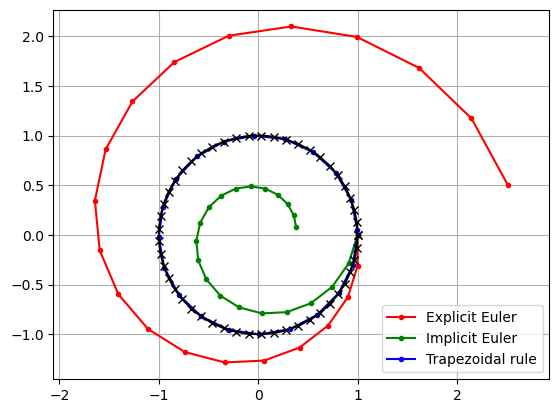

In [11]:
n = 20
V1 = solve_euler_e(2* np.pi, n)
V2 = solve_euler_i(2* np.pi, n)
V3 = solve_trap(2 * np.pi, n)
fig, ax = plt.subplots()
ax.plot(V1[0,:], V1[1,:], 'r.-', label = 'Explicit Euler')
ax.plot(V2[0,:], V2[1,:], 'g.-', label = 'Implicit Euler')
ax.plot(V3[0,:], V3[1,:], 'b.-', label = 'Trapezoidal rule')
t = np.linspace(0, 2*np.pi)
ax.plot(np.cos(t), -np.sin(t),'k-x')
ax.axis('equal')
ax.legend()
ax.grid(True)

## Область устойчивость явных методов


Text(0, 0.5, 'Im z')

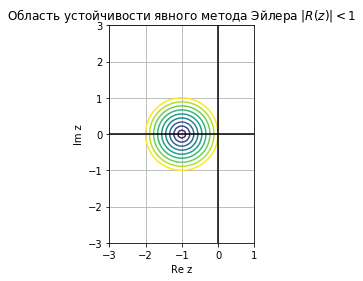

In [20]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

p = lambda z : 1 + z # + z**2/2  + z**3/6 + z**4/24#

x = np.linspace(-5, 1, 100)
y = np.linspace(-5, 5, 100)

X,Y = np.meshgrid(x,y)
Z = np.abs(p(X + Y*1j))
fig, ax = plt.subplots()
plt.contour(X, Y, Z, levels = np.linspace(0,1, 10))
ax.axhline(0,color='k') # x = 0
ax.axvline(0,color='k') # y = 0
ax.set_aspect('equal')
ax.set_xlim(-3, 1)
ax.set_ylim(-3, 3)
ax.grid(True)
plt.title('Область устойчивости явного метода Эйлера $|R(z)| < 1$')
plt.xlabel('Re z')
plt.ylabel('Im z')

### С помощью многочленов Чебышёва можно построить явный метод с расширенной областью устойчивости

Text(0, 0.5, 'Im z')

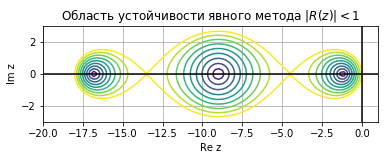

In [21]:
T_3 = lambda z: np.cos(3 * np.arccos(z))

pc = lambda z: T_3(1 + z/3**2)

x = np.linspace(-20, 1, 100)
y = np.linspace(-5, 5, 100)

X,Y = np.meshgrid(x,y)
Z = np.abs(pc(X + Y*1j))
fig, ax = plt.subplots()
plt.contour(X, Y, Z, levels = np.linspace(0,1, 10))
ax.axhline(0,color='k') # x = 0
ax.axvline(0,color='k') # y = 0
ax.set_aspect('equal')
ax.set_xlim(-20, 1)
ax.set_ylim(-3, 3)
ax.grid(True)
plt.title('Область устойчивости явного метода $|R(z)| < 1$')
plt.xlabel('Re z')
plt.ylabel('Im z')